In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn import linear_model, svm, gaussian_process
from sklearn.linear_model import ElasticNet, Lasso, LassoLars, Ridge, BayesianRidge,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

import xgboost as xgb
import lightgbm as lgb
from mlxtend.regressor import StackingRegressor

## Load Data

In [3]:
df_train = pd.read_csv("df_train.csv",encoding = "utf8") 
df_test = pd.read_csv("df_test.csv",encoding = "utf8") 

In [4]:
CM_CUST=['CUST_NO', 'CUST_YEAR', 'D90_TXN_CNT', # 'CUST_START_DT',
       'BROWSE_CNT','BROWSE_URL',
       'BROWSE_DATE_LAST_DAYS','BROWSE_DATE_FIRST_DAYS', 
       'PAGE_OFTEN_CAT_3','PAGE_OFTEN_CAT_5','PAGE_OFTEN_CAT_9','PAGE_OFTEN_CAT_11','PAGE_OFTEN_CAT_14','PAGE_OFTEN_CAT_19',
       'PAGE_OFTEN_CAT_21','PAGE_OFTEN_CAT_23','PAGE_OFTEN_CAT_25','PAGE_OFTEN_CAT_35','PAGE_OFTEN_CAT_69',
       'PAGE_OFTEN_CAT_135','PAGE_OFTEN_CAT_155','PAGE_OFTEN_CAT_177','PAGE_OFTEN_CAT_192','PAGE_OFTEN_CAT_196',
       'PAGE_OFTEN_CAT_210','PAGE_OFTEN_CAT_223', 'PAGE_OFTEN_CAT_252','PAGE_OFTEN_CAT_257','PAGE_OFTEN_CAT_259',
       'PAGE_OFTEN_CAT_261','PAGE_OFTEN_CAT_999',
       'GENDER_CODE_F', 'GENDER_CODE_M','GENDER_CODE_999','AGE_1', 'AGE_2','AGE_3', 'AGE_4', 
       'CHILDREN_CNT_0.0', 'CHILDREN_CNT_1.0','CHILDREN_CNT_2.0', 'CHILDREN_CNT_3.0', 'CHILDREN_CNT_4.0',
       'CHILDREN_CNT_5.0', 'CHILDREN_CNT_6.0', 'CHILDREN_CNT_9.0','CHILDREN_CNT_10.0', 'CHILDREN_CNT_999.0',
       'EDU_CODE_1.0', 'EDU_CODE_2.0', 'EDU_CODE_3.0','EDU_CODE_4.0', 'EDU_CODE_5.0', 'EDU_CODE_6.0', 'EDU_CODE_999.0',
       'INCOME_RANGE_CODE_1.0','INCOME_RANGE_CODE_2.0', 'INCOME_RANGE_CODE_3.0','INCOME_RANGE_CODE_4.0', 'INCOME_RANGE_CODE_999.0',
       'WORK_MTHS_1.0', 'WORK_MTHS_2.0','WORK_MTHS_3.0', 'WORK_MTHS_4.0', 'WORK_MTHS_5.0','WORK_MTHS_999.0',
       'GENDER_LN','AGE_LN','CHILDREN_LN','EDU_CODE_LN','INCOME_RANGE_LN','WORK_MTHS_LN',
       'GENDER_CC','AGE_CC','CHILDREN_CC','EDU_CODE_CC','INCOME_RANGE_CC','WORK_MTHS_CC',
       'GENDER_FX','AGE_FX','CHILDREN_FX','EDU_CODE_FX','INCOME_RANGE_FX','WORK_MTHS_FX',
       'GENDER_WM','AGE_WM','CHILDREN_WM','EDU_CODE_WM','INCOME_RANGE_WM','WORK_MTHS_WM']

In [5]:
CM_WM = ['D0_WM_LAST_DAYS','D90_WM_CNT', 
         'WM_DAY_INTERVAL_LAST','WM_DAY_INTERVAL_FIRST','WM_DAY_INTERVAL_AVG',  
         'D90_WM_AMT_SUM','D90_WM_AMT_MIN','D90_WM_AMT_MAX','D90_WM_AMT_STD','D90_WM_AMT_AVG',
         'D90_WM_CUST_RISK_CODE', 'D90_WM_CUST_INVEST_TYPE_CODE']
CM_FX = ['D0_FX_LAST_DAYS','D90_FX_CNT', 
         'FX_DAY_INTERVAL_LAST','FX_DAY_INTERVAL_FIRST','FX_DAY_INTERVAL_AVG',  
         'D90_FX_AMT_SUM','D90_FX_AMT_MIN','D90_FX_AMT_MAX','D90_FX_AMT_STD','D90_FX_AMT_AVG']

In [6]:
df_train=df_train[df_train.BROWSE_CNT>0]

In [7]:
df_train.NEXT_FX_APPLY.value_counts()

0.0    52709
1.0     5950
Name: NEXT_FX_APPLY, dtype: int64

In [8]:
train=df_train.copy().fillna(0)
test=df_test.copy().fillna(0)

In [9]:
Y=train[['NEXT_FX_APPLY']].fillna(0)

In [10]:
train=train[CM_CUST+CM_FX+CM_WM]
test=test[CM_CUST+CM_FX+CM_WM]

In [11]:
train=train.drop(['CUST_NO'], axis=1)
test=test.drop(['CUST_NO'], axis=1)

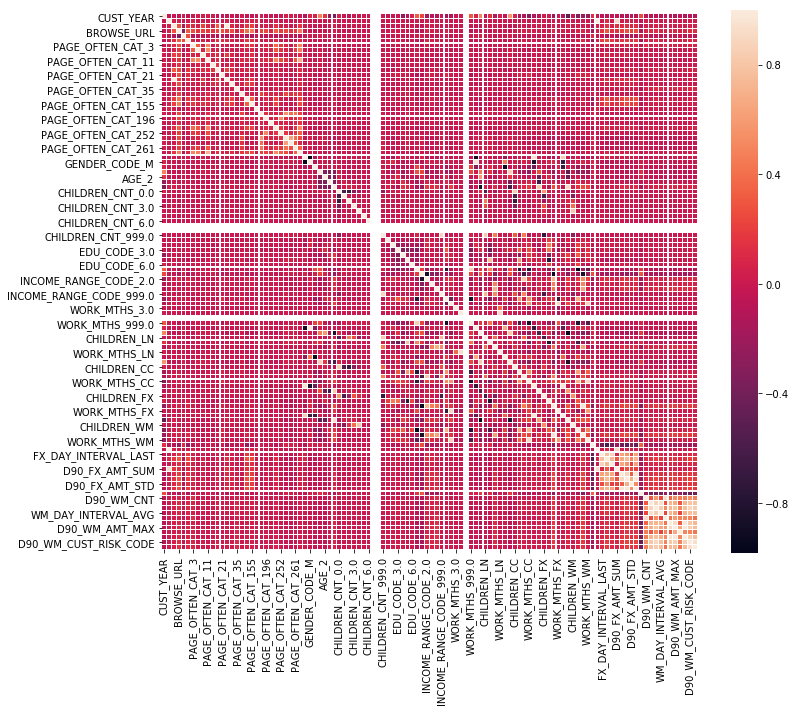

In [12]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, linewidths=0.1, vmax=1.0, square=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58659 entries, 5 to 187678
Columns: 110 entries, CUST_YEAR to D90_WM_CUST_INVEST_TYPE_CODE
dtypes: float64(110)
memory usage: 49.7 MB


In [14]:
X_train, X_test, y_train, y_test = train_test_split(train,Y, test_size=0.3, random_state=42)

In [15]:
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)
test_std=sc.fit_transform(test)

In [16]:
gdbc=GradientBoostingClassifier(learning_rate=0.5, random_state=42,n_estimators=100)

In [17]:
gdbc.fit(X_train, y_train)

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [18]:
print("R Square:",gdbc.score(X_test, y_test))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gdbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gdbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gdbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gdbc.predict(X_test)))

R Square: 0.9059552221843391
ROC AUC score: 0.8752439181108236
F1 Square: 0.3445544554455446
recall: 0.2492836676217765
precision: 0.5576923076923077


In [19]:
lr= LogisticRegression(penalty='l1',C=1, random_state=42)
lr.fit(X_train_std, y_train)

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
print("R Square:",lr.score(X_test_std, y_test))
print("ROC AUC score:",metrics.roc_auc_score(y_test,lr.predict_proba(X_test_std)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,lr.predict(X_test_std)))
print("recall:",metrics.recall_score(y_test,lr.predict(X_test_std)))
print("precision:",metrics.precision_score(y_test,lr.predict(X_test_std)))

R Square: 0.9051596772360495
ROC AUC score: 0.8573053973496109
F1 Square: 0.2821505376344086
recall: 0.18796561604584527
precision: 0.5655172413793104


In [21]:
lgbc = lgb.LGBMClassifier(learning_rate=0.5,n_estimators=100,random_state=42)
lgbc.fit(X_train, y_train) 

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.5, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=42,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [22]:
print("R Square:",lgbc.score(X_test, y_test))
print("ROC AUC score:",metrics.roc_auc_score(y_test,lgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,lgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,lgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,lgbc.predict(X_test)))

R Square: 0.8931128537333788
ROC AUC score: 0.8429682124287667
F1 Square: 0.3475546305931322
recall: 0.2871060171919771
precision: 0.44024604569420034


In [23]:
params = {'learning_rate':[0.5],'n_estimators':[100]}
gs_lgbc = GridSearchCV(estimator=lgbc, param_grid=params, cv=3, verbose=2, scoring='f1') 
gs_lgbc.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] learning_rate=0.5, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.5, n_estimators=100, total=   0.5s
[CV] learning_rate=0.5, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.5, n_estimators=100, total=   0.5s
[CV] learning_rate=0.5, n_estimators=100 .............................


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.5, n_estimators=100, total=   0.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s finished
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.5, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=42,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.5], 'n_estimators': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [24]:
gs_lgbc.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.5, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=42,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [25]:
print("R Square:",metrics.accuracy_score(y_test, gs_lgbc.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gs_lgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gs_lgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gs_lgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gs_lgbc.predict(X_test)))

R Square: 0.8931128537333788
ROC AUC score: 0.8429682124287667
F1 Square: 0.3475546305931322
recall: 0.2871060171919771
precision: 0.44024604569420034


In [26]:
print("R Square:",metrics.accuracy_score(y_test, gs_lgbc.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gs_lgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gs_lgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gs_lgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gs_lgbc.predict(X_test)))

R Square: 0.8931128537333788
ROC AUC score: 0.8429682124287667
F1 Square: 0.3475546305931322
recall: 0.2871060171919771
precision: 0.44024604569420034


In [27]:
xgbc = xgb.XGBClassifier(learning_rate=1, n_estimators=300,random_state=42, tree_method='gpu_hist')
xgbc.fit(X_train,y_train)

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, tree_method='gpu_hist')

In [28]:
print("R Square:",metrics.accuracy_score(y_test, xgbc.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,xgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,xgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,xgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,xgbc.predict(X_test)))

R Square: 0.8964655074440278
ROC AUC score: 0.8364332621142997
F1 Square: 0.3678001387925052
recall: 0.3037249283667622
precision: 0.46613896218117856


In [29]:
print("R Square:",metrics.accuracy_score(y_test, xgbc.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,xgbc.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,xgbc.predict(X_test)))
print("recall:",metrics.recall_score(y_test,xgbc.predict(X_test)))
print("precision:",metrics.precision_score(y_test,xgbc.predict(X_test)))

R Square: 0.8964655074440278
ROC AUC score: 0.8364332621142997
F1 Square: 0.3678001387925052
recall: 0.3037249283667622
precision: 0.46613896218117856


In [30]:
params = {'learning_rate':[0.5,1,1.2,1.5],'n_estimators':[200,100,300]}
gs = GridSearchCV(estimator=xgbc, param_grid=params, cv=3,n_jobs=-1,verbose=2, scoring='f1') 
gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed:   36.3s remaining:    4.4s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   39.2s finished
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, tree_method='gpu_hist'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.5, 1, 1.2, 1.5], 'n_estimators': [200, 100, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=2)

In [31]:
gs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1, tree_method='gpu_hist')

In [32]:
print("R Square:",metrics.accuracy_score(y_test, gs.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gs.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gs.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gs.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gs.predict(X_test)))

R Square: 0.8967496306398455
ROC AUC score: 0.8489970985217518
F1 Square: 0.35998591053187745
recall: 0.29283667621776505
precision: 0.4670932358318099


In [33]:
print("R Square:",metrics.accuracy_score(y_test, gs.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gs.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gs.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gs.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gs.predict(X_test)))

R Square: 0.8967496306398455
ROC AUC score: 0.8489970985217518
F1 Square: 0.35998591053187745
recall: 0.29283667621776505
precision: 0.4670932358318099


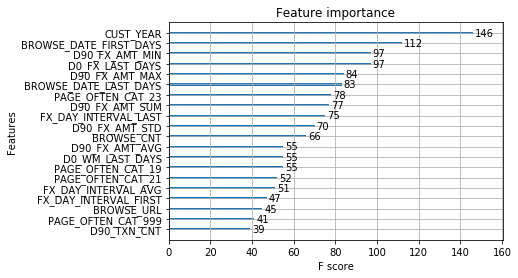

In [34]:
from xgboost import plot_importance
plot_importance(xgbc,max_num_features=20)
plt.show()

In [35]:
clf = RandomForestClassifier(n_estimators=100)
params = {'class_weight':[{0:1, 1:pos_weight} for pos_weight in np.arange(1, 2,1)]}
gs_rfx = GridSearchCV(estimator=clf, param_grid=params, cv=3, scoring='f1') 
gs_rfx.fit(X_train, y_train)

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'class_weight': [{0: 1, 1: 1}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [36]:
gs_rfx.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [37]:
print("R Square:",metrics.accuracy_score(y_test, gs_rfx.predict(X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,gs_rfx.predict_proba(X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,gs_rfx.predict(X_test)))
print("recall:",metrics.recall_score(y_test,gs_rfx.predict(X_test)))
print("precision:",metrics.precision_score(y_test,gs_rfx.predict(X_test)))

R Square: 0.907830435276736
ROC AUC score: 0.8659310278513355
F1 Square: 0.29722703639514736
recall: 0.19656160458452723
precision: 0.6092362344582594


In [38]:
from vecstack import stacking
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.2, random_state=42)

In [39]:
# Initialize 1st level estimators
models = [gdbc,gs_lgbc.best_estimator_,gs.best_estimator_,gs_rfx.best_estimator_,lr]

S_X_train, S_X_test = stacking(models, X_train, y_train, X_test, 
    regression = False, metric = metrics.log_loss, n_folds = 4,needs_proba=True,
    stratified = True, shuffle = True, random_state = 42, verbose = 2)

S_X_train.shape,S_X_test.shape,

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [GradientBoostingClassifier]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    fold  0:  [0.24353683]
    fold  1:  [0.25048288]
    fold  2:  [0.25588196]
    fold  3:  [0.24271594]
    ----
    MEAN:     [0.24815440] + [0.00538600]
    FULL:     [0.24815452]

model  1:     [LGBMClassifier]
    fold  0:  [0.28924002]
    fold  1:  [0.34041699]
    fold  2:  [0.30126429]
    fold  3:  [0.30390872]
    ----
    MEAN:     [0.30870751] + [0.01912397]
    FULL:     [0.30870761]

model  2:     [XGBClassifier]
    fold  0:  [0.28084589]
    fold  1:  [0.28720317]
    fold  2:  [0.28864890]
    fold  3:  [0.28307876]
    ----
    MEAN:     [0.28494418] + [0.00312665]
    FULL:     [0.28494422]

model  3:     [RandomForestClassifier]
    fold  0:  [0.32023188]
    fold  1:  [0.31238260]
    fold  2:  [0.31755995]
    fold  3:  [0.31727445]
    ----
    MEAN:     [0.31686222] + [0.00283189]
    FULL:     [0.31686221]

model  4:     [LogisticRegression]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.24831549]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.24877794]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.25300067]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.24378811]
    ----
    MEAN:     [0.24847055] + [0.00326212]
    FULL:     [0.24847065]



((46927, 10), (11732, 10))

In [40]:
# Initialize 2nd level model
model = LogisticRegression(penalty='l1',C=1, random_state=42)
    
# Fit 2nd level model
model = model.fit(S_X_train, y_train)

# Predict
y_pred = model.predict(S_X_test)
y_pred_proba = model.predict_proba(S_X_test)[:,1]

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
print("R Square:",metrics.accuracy_score(y_test, model.predict(S_X_test)))
print("ROC AUC score:",metrics.roc_auc_score(y_test,model.predict_proba(S_X_test)[:,1]))
print("F1 Square:",metrics.f1_score(y_test,model.predict(S_X_test)))
print("recall:",metrics.recall_score(y_test,model.predict(S_X_test)))
print("precision:",metrics.precision_score(y_test,model.predict(S_X_test)))

R Square: 0.9088816911012615
ROC AUC score: 0.8780803701889842
F1 Square: 0.35872825434913014
recall: 0.25446808510638297
precision: 0.6077235772357723


In [42]:
y_pred.sum(),y_pred_proba.sum(),y_pred,y_pred_proba

(492.0,
 1186.2975697533661,
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.04960695, 0.05597181, 0.05054686, ..., 0.0312417 , 0.03196995,
        0.03106455]))

In [43]:
predict_stack = pd.DataFrame(y_pred_proba, columns=['FX_IND_P'])

In [44]:
# Use trial and error, found 0.152 is the best threshold to max F1-score
predict_stack['FX_IND']=np.where(predict_stack.FX_IND_P>0.152,1,0)
predict_stack['FX_IND'].value_counts()

0    9854
1    1878
Name: FX_IND, dtype: int64

In [45]:
# find max F1-score is 0.472 > default threshold F1-score 0.359
print("R Square:",metrics.accuracy_score(y_test, predict_stack['FX_IND']))
print("ROC AUC score:",metrics.roc_auc_score(y_test,predict_stack['FX_IND_P']))
print("F1 Square:",metrics.f1_score(y_test,predict_stack['FX_IND']))
print("recall:",metrics.recall_score(y_test,predict_stack['FX_IND']))
print("precision:",metrics.precision_score(y_test,predict_stack['FX_IND']))

R Square: 0.8625127855438118
ROC AUC score: 0.8780803701889842
F1 Square: 0.4716672125777923
recall: 0.6127659574468085
precision: 0.38338658146964855


In [46]:
# Initialize 1st level estimators
models = [gdbc,gs_lgbc.best_estimator_,gs.best_estimator_,gs_rfx.best_estimator_,lr]

S_train, S_test = stacking(models, train, Y, test, 
    regression = False, metric = metrics.log_loss, n_folds = 4,needs_proba=True,
    stratified = True, shuffle = True, random_state = 42, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [GradientBoostingClassifier]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    fold  0:  [0.24305487]
    fold  1:  [0.23767408]
    fold  2:  [0.23460302]
    fold  3:  [0.24836789]
    ----
    MEAN:     [0.24092496] + [0.00525521]
    FULL:     [0.24092498]

model  1:     [LGBMClassifier]
    fold  0:  [0.30117401]
    fold  1:  [0.30145551]
    fold  2:  [0.28565022]
    fold  3:  [0.34321622]
    ----
    MEAN:     [0.30787399] + [0.02138373]
    FULL:     [0.30787365]

model  2:     [XGBClassifier]
    fold  0:  [0.27413045]
    fold  1:  [0.27454780]
    fold  2:  [0.26022729]
    fold  3:  [0.27254547]
    ----
    MEAN:     [0.27036275] + [0.00589920]
    FULL:     [0.27036295]

model  3:     [RandomForestClassifier]
    fold  0:  [0.30994246]
    fold  1:  [0.30001910]
    fold  2:  [0.30012652]
    fold  3:  [0.31823017]
    ----
    MEAN:     [0.30707956] + [0.00759485]
    FULL:     [0.30707954]

model  4:     [LogisticRegression]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.24839128]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  1:  [0.24501184]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  2:  [0.24671453]


C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  3:  [0.24865147]
    ----
    MEAN:     [0.24719228] + [0.00146197]
    FULL:     [0.24719228]



In [47]:
# Initialize 2nd level model
model2 = LogisticRegression(penalty='l1',C=1, random_state=42)
    
# Fit 2nd level model
model2 = model2.fit(S_train, Y)

# Predict
y_pred2 = model2.predict(S_test)
y_pred2_proba = model2.predict_proba(S_test)[:,1]

C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anson\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
y_pred2.sum(),y_pred2_proba.sum(),y_pred2_proba

(665.0,
 2264.0402461401814,
 array([0.40527361, 0.02938805, 0.41742798, ..., 0.03210411, 0.31060181,
        0.03371979]))

In [49]:
predict_stack2 = pd.DataFrame(y_pred2_proba, columns=['FX_IND_P'])

In [50]:
predict_stack2['FX_IND']=np.where(predict_stack2.FX_IND_P>0.152,1,0)
predict_stack2['FX_IND'].value_counts()

0    27019
1     2981
Name: FX_IND, dtype: int64

In [51]:
predict_stack2.to_csv('FX_result.csv', index=False)